In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv(r"E:\Data Analyst\Projects\Pizza_Sales\Pizza_Sales_Data\pizza_sales.csv")

In [41]:
df.head(3)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [45]:
df.duplicated().sum()

0

In [47]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [49]:
df['order_date']=pd.to_datetime(df['order_date'],format='%d-%m-%Y',errors='coerce')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [59]:
df['order_time']=pd.to_datetime(df['order_time'],format='%H:%M:%S',errors='coerce').dt.time

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [63]:
df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.hour

In [65]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11


Total Revenue

In [67]:
Total_Revenue=df['total_price'].sum()

In [71]:
print(Total_Revenue)

817860.05


Total Quantity

In [73]:
Total_Quantity=df['quantity'].sum()

In [75]:
print(Total_Quantity)

49574


Total Orders

In [77]:
Total_Orders=df['order_id'].nunique()
print(Total_Orders)

21350


Average order

In [79]:
Avg_order=Total_Quantity/Total_Orders
print(Avg_order)

2.321967213114754


Average order value

In [81]:
Avg_order_value=Total_Revenue/Total_Orders
print(Avg_order_value)

38.30726229508197


In [83]:
df['order_day']=pd.to_datetime(df['order_date']).dt.day_name()

In [99]:
df.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_hour,order_day
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,Thursday


Daily Trends for Total Orders

In [149]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_orders=df.groupby('order_day')['order_id'].nunique().reindex(weekday_order).reset_index()
daily_orders.columns= ['order_day', 'Total_Orders']
sort_data=daily_orders.sort_values(by='Total_Orders',ascending=False)

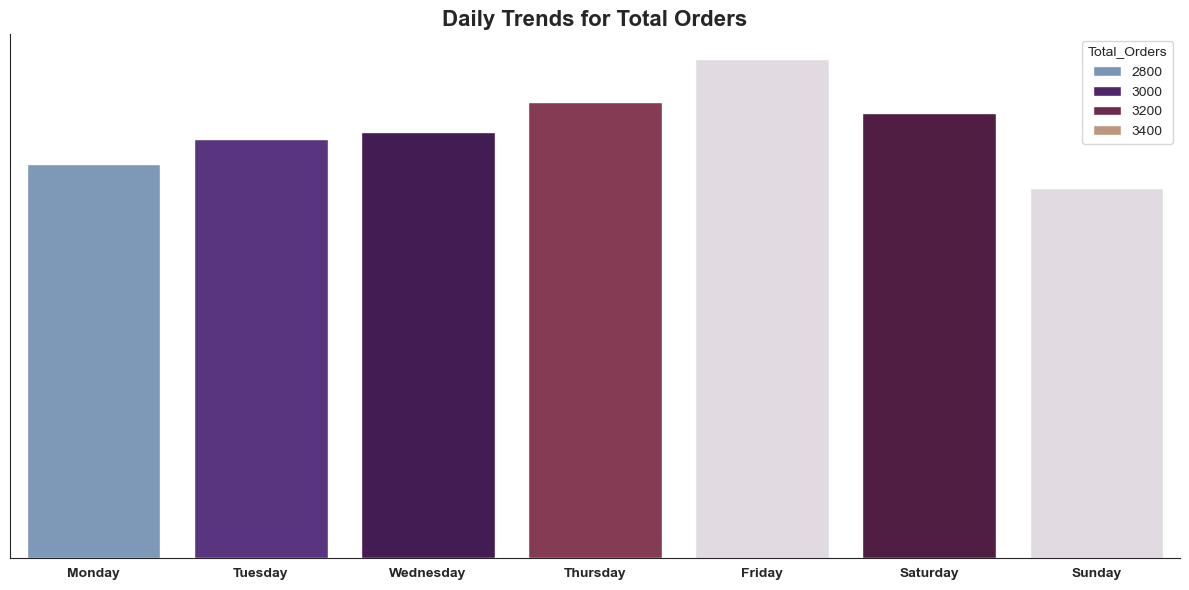

In [171]:
plt.figure(figsize=(12,6))
sns.barplot(x='order_day', y='Total_Orders', data=daily_orders, palette='twilight',hue='Total_Orders')
plt.title('Daily Trends for Total Orders', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=10, weight='bold')
plt.yticks([])
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

In [179]:
df['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [185]:
df['pizza_size']=df['pizza_size'].replace({
    'S':'Small',
    'M':'Medium',
    'L':'Large',
    'XL':'X-Large',
    'XXL':'xx-Large'
})

In [187]:
df['pizza_size'].unique()

array(['Medium', 'Large', 'Small', 'X-Large', 'xx-Large'], dtype=object)

sales by Pizza size

In [257]:
pizza_size=df.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False)

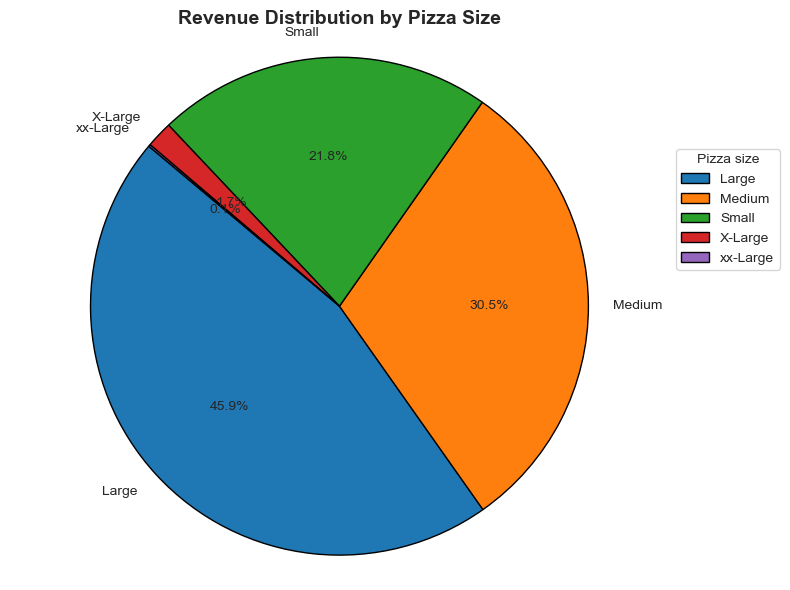

In [269]:
plt.figure(figsize=(8,6))
colors = plt.get_cmap('tab10').colors 
plt.pie(pizza_size,labels=pizza_size.index,autopct='%1.1f%%',startangle=140,colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Revenue Distribution by Pizza Size', fontsize=14, weight='bold')
plt.axis('equal')   
plt.legend(title='Pizza size', bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()

Hourly trend for total orders

In [237]:

hourly_sales = (
    df.groupby('order_hour')['order_id']       
      .nunique()                            
      .reset_index(name='Total_Orders')        
)

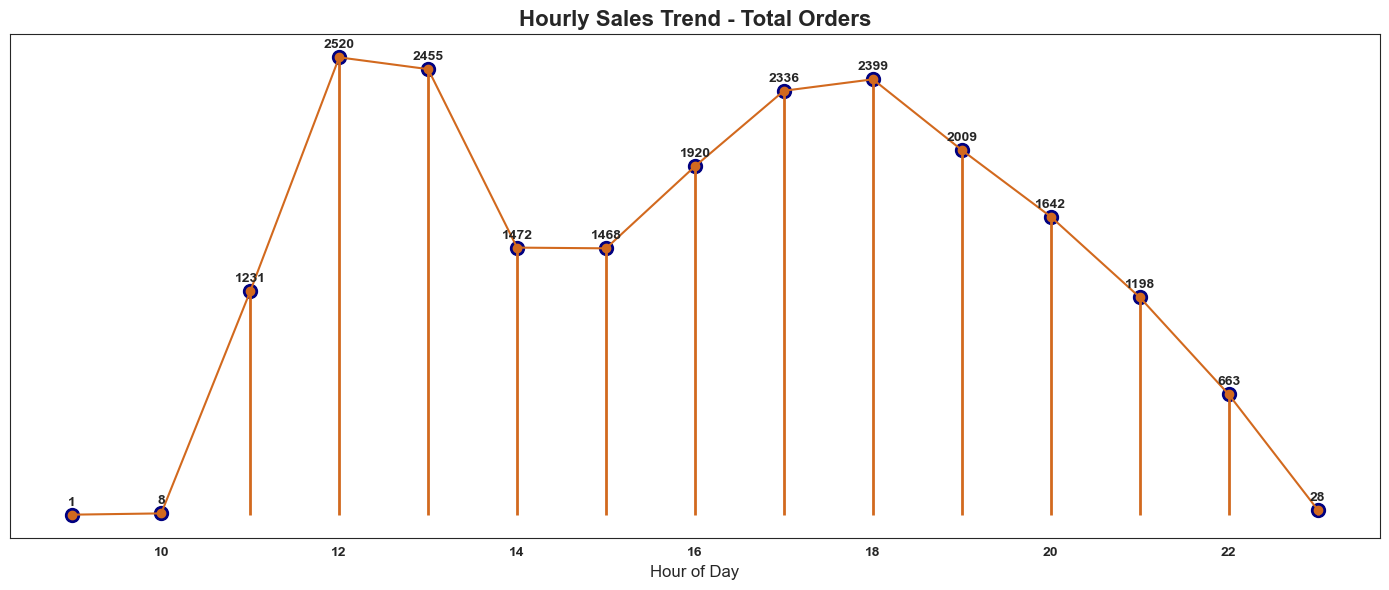

In [239]:
plt.figure(figsize=(14,6))
ax=plt.gca()
ax.plot(hourly_sales['order_hour'], hourly_sales['Total_Orders'], marker='o', color='chocolate')
ax.vlines(hourly_sales['order_hour'], 0, hourly_sales['Total_Orders'], color='chocolate', linewidth=2)
ax. scatter(hourly_sales['order_hour'], hourly_sales['Total_Orders'], s=100, color='navy')
for i in range(len(hourly_sales)):
    plt.text(hourly_sales['order_hour'][i], hourly_sales['Total_Orders'][i] + 50,
             str(hourly_sales['Total_Orders'][i]),
             ha='center', fontsize=10, fontweight='bold')

plt.title('Hourly Sales Trend - Total Orders', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks([])
plt.grid(False)
plt.xlabel('Hour of Day', fontsize=12)
plt.tight_layout()
plt.show()
plt.show()

sold by pizza category

In [291]:
pizza_category=df.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)

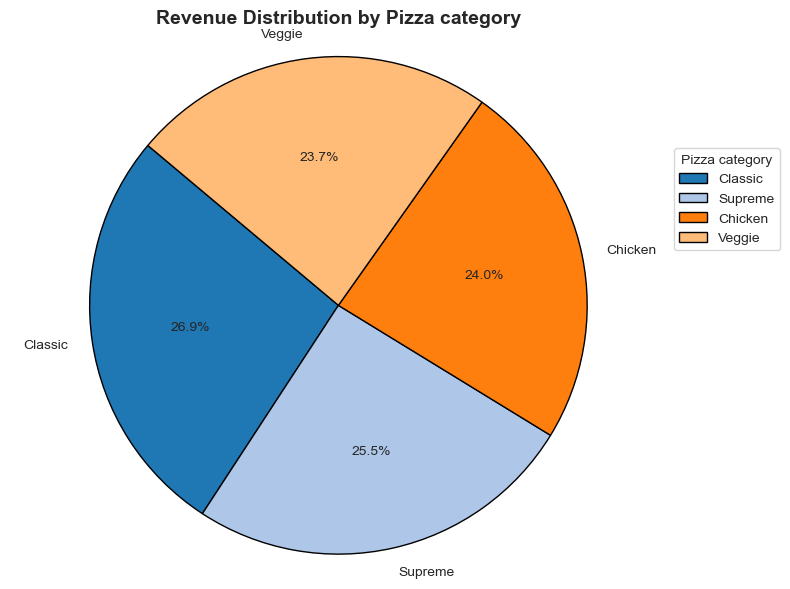

In [297]:

plt.figure(figsize=(8,6))
colors = plt.cm.tab20.colors[:len(pizza_category)] 
plt.pie(pizza_category,labels=pizza_category.index,autopct='%1.1f%%',startangle=140,colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Revenue Distribution by Pizza category', fontsize=14, weight='bold')
plt.axis('equal')   
plt.legend(title='Pizza category', bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()

In [317]:

category_orders = df.groupby('pizza_category')['order_id'].nunique().sort_values()

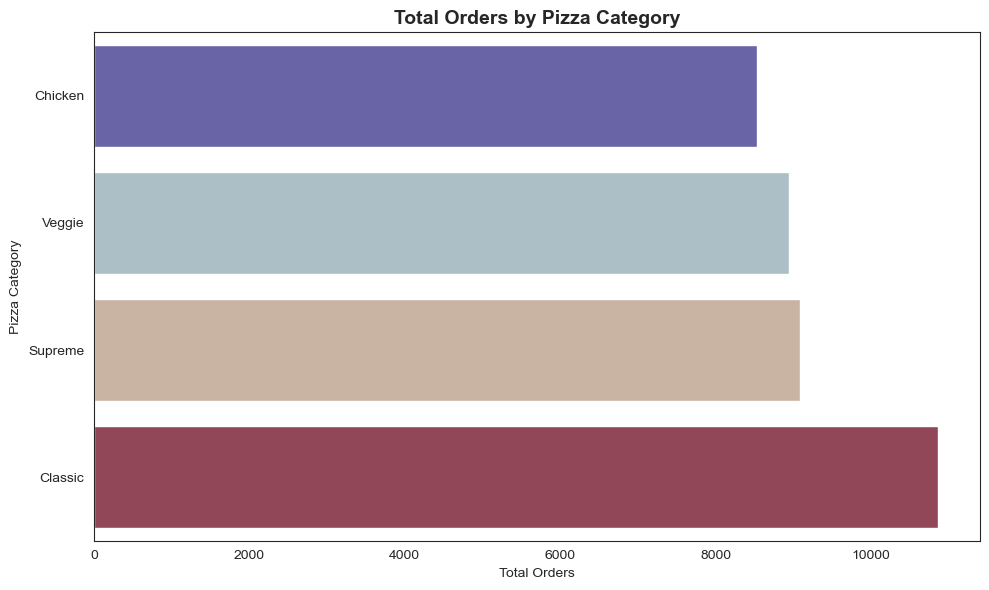

In [349]:

plt.figure(figsize=(10, 6))
sns.barplot(x=category_orders, y=category_orders.index, hue=category_orders.index,
                 palette='twilight_shifted', dodge=False, legend=False)

plt.title('Total Orders by Pizza Category', fontsize=14, weight='bold')
plt.xlabel('Total Orders')
plt.ylabel('Pizza Category')
plt.tight_layout()
plt.show()

Top 5 Best seller by Total ordes

In [371]:
Best_seller=df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(5).reset_index()

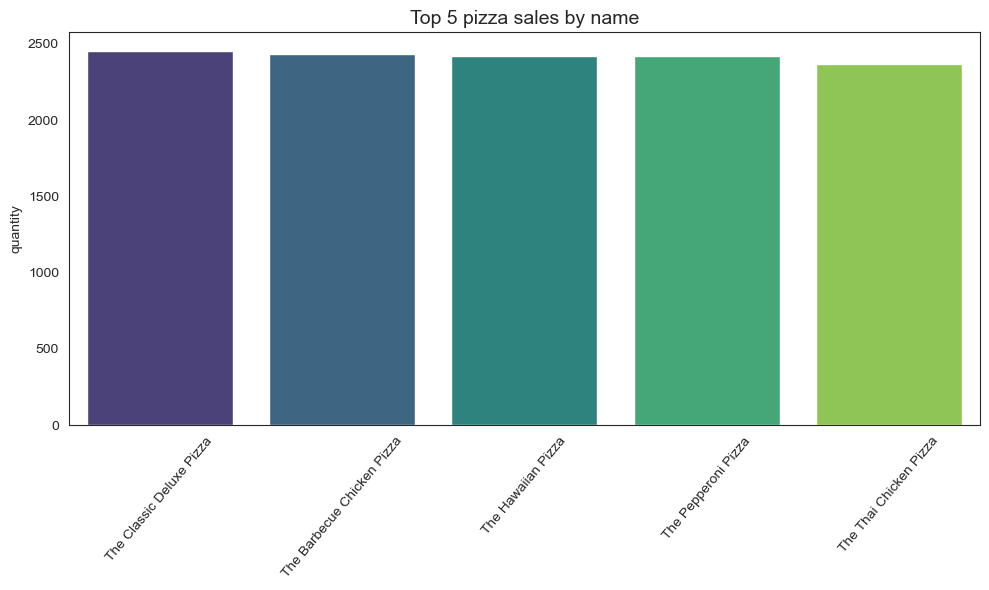

In [405]:

plt.figure(figsize=(10, 6))
sns.barplot(x='pizza_name',y='quantity',data=Best_seller,palette='viridis',hue='pizza_name')
plt.title('Top 5 pizza sales by name',fontsize=14,weight=14)
plt.xlabel('')

plt.xticks(rotation=50,fontsize=10)
plt.tight_layout()
plt.show()

Bottom 5 Best seller by Total ordes

In [409]:
bottom_seller=df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).tail(5).reset_index()

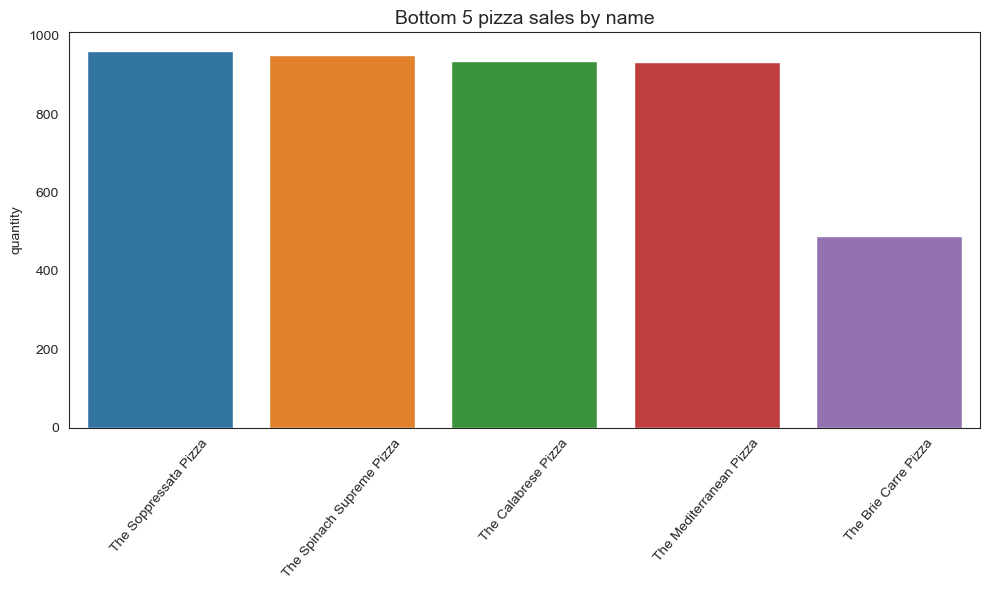

In [421]:

plt.figure(figsize=(10, 6))
sns.barplot(x='pizza_name',y='quantity',data=bottom_seller,hue='pizza_name')
plt.title('Bottom 5 pizza sales by name',fontsize=14,weight=14)
plt.xlabel('')

plt.xticks(rotation=50,fontsize=10)
plt.tight_layout()
plt.show()